<div align="center"><h1>
FYS-STK4155 - Exercises Week 38
</div>
<hr style="border:2px solid gray"> </hr>
<div align="center"><h3>
Håvard Skåli
</div>

In [3]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn.utils import resample

## Derivations:

<!-- We have
$$
\begin{align}
\mathbb{E}\left[(\mathbf{y}-\mathbf{\tilde{y}})^2 \right] &= \mathbb{E}\left[(\mathbf{\tilde{y}}-\mathbf{y})^2 \right]
\\
&= \text{Var}\left[\mathbf{\tilde{y}}-\mathbf{y}\right] + \left(\mathbb{E}\left[\mathbf{\tilde{y}}-\mathbf{y}\right] \right)^2,
\\
&= \text{Var}\left[\mathbf{\tilde{y}}\right] - \text{Var}\left[\mathbf{y}\right] + \left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2-2\mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbb{E}\left[\mathbf{y}\right] +\left(\mathbb{E}\left[\mathbf{y}\right]\right)^2,
\\
&= \sigma^2 + \mathbb{E}\left[\mathbf{y}^2 \right] - \text{Var}\left[\mathbf{y}\right] -2\mathbb{E}\left[\mathbf{y}\right]\mathbb{E}\left[\mathbf{\tilde{y}}\right] + \mathbb{E}\left[\mathbf{\tilde{y}}^2 \right] - \text{Var}\left[\mathbf{\tilde{y}}\right],
\\
&= \mathbb{E}\left[\mathbf{y}^2 \right]  -2\mathbb{E}\left[\mathbf{y}\right]\mathbb{E}\left[\mathbf{\tilde{y}}\right] + \mathbb{E}\left[\mathbf{\tilde{y}}^2 \right] - 2\text{Var}\left[\mathbf{\tilde{y}}\right]
\end{align}
$$


$$
\begin{align}
\mathbb{E}\left[(\mathbf{y}-\mathbf{\tilde{y}})^2 \right] &= \mathbb{E}\left[\mathbf{y}^2 - 2\mathbf{y}\cdot\mathbf{\tilde{y}} + \mathbf{\tilde{y}}^2\right]
\\
&= \mathbb{E}\left[\mathbf{y}^2\right] + \mathbb{E}\left[- 2\mathbf{y}\cdot\mathbf{\tilde{y}}\right] + \mathbb{E}\left[\mathbf{\tilde{y}}^2\right],
\\
&= \text{Var}\left[\mathbf{y}\right] + \left(\mathbb{E}\left[\mathbf{y}\right]\right)^2 - 2\Big(\mathbb{E}\left[\mathbf{y}\right]\mathbb{E}\left[\mathbf{\tilde{y}}\right] + \text{Cov}\left[\mathbf{y},\mathbf{\tilde{y}}\right]\Big) + \text{Var}\left[\mathbf{\tilde{y}}\right] + \left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2,
\\
&= \text{Var}\left[\mathbf{y}\right] + \left(\mathbb{E}\left[\mathbf{y}\right]\right)^2 - 2\mathbb{E}\left[\mathbf{y}\right]\mathbb{E}\left[\mathbf{\tilde{y}}\right] + \left(\mathbb{E}\left[\mathbf{\tilde{y}} \right]\right)^2 + \text{Var}\left[\mathbf{\tilde{y}}\right] - 2\mathbb{E}\Big[\Big( \mathbf{y} - \mathbb{E}[\mathbf{y}]\Big)\Big( \mathbf{\tilde{y}} - \mathbb{E}[\mathbf{\tilde{y}}]\Big) \Big],
\\
&= \text{Bias}\left[\mathbf{\tilde{y}} \right] + \text{Var}\left[\mathbf{\tilde{y}} \right]
\end{align}
$$


$$
\begin{align}
\mathbb{E}\left[(\mathbf{y}-\mathbf{\tilde{y}})^2 \right] &= \text{Var}\left[\mathbf{y} -\mathbf{\tilde{y}}\right] + \left(\mathbb{E}\left[\mathbf{\mathbf{y}-\tilde{y}}\right] \right)^2,
\\
&= \text{Var}\left[\mathbf{y}\right]-\text{Var}\left[\mathbf{\tilde{y}}\right] + \left(\mathbb{E}\left[\mathbf{y}\right]\right)^2-2\mathbb{E}\left[\mathbf{y}\right]\mathbb{E}\left[\mathbf{\tilde{y}}\right] +\left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2,
\\
&= \sigma^2 + \mathbb{E}\left[\mathbf{y}^2 \right] - \text{Var}\left[\mathbf{y}\right] -2\mathbb{E}\left[\mathbf{y}\right]\mathbb{E}\left[\mathbf{\tilde{y}}\right] + \mathbb{E}\left[\mathbf{\tilde{y}}^2 \right] - \text{Var}\left[\mathbf{\tilde{y}}\right],
\\
&= \mathbb{E}\left[\mathbf{y}^2 \right]  -2\mathbb{E}\left[\mathbf{y}\right]\mathbb{E}\left[\mathbf{\tilde{y}}\right] + \mathbb{E}\left[\mathbf{\tilde{y}}^2 \right] - 2\text{Var}\left[\mathbf{\tilde{y}}\right]
\end{align}
$$



$$
\begin{align}
\text{Bias}\left[\tilde{y}\right] &= \mathbb{E}\left[\left(\mathbf{y}-\mathbb{E}\left[\mathbf{\tilde{y}}\right] \right)^2 \right],
\\
&= \mathbb{E}\left[\mathbf{y}^2\right] - \mathbb{E}\Big[2\mathbf{y}\mathbb{E}\left[\mathbf{\tilde{y}}\right]\Big] + \mathbb{E}\Big[\left(\mathbb{E}[\mathbf{\tilde{y}}] \right)^2 \Big],
\\
&= \sigma^2 + \left(\mathbb{E}\left[\mathbf{y}\right]\right)^2 - 2\mathbb{E}\left[\mathbf{y}\right]\mathbb{E}\left[\mathbf{\tilde{y}}\right] + \left(\mathbb{E}\left[\mathbf{\tilde{y}} \right]\right)^2.
\end{align}
$$


$$
\begin{align}
\text{Var}\left[\tilde{y}\right] &= \mathbb{E}\left[\left(\mathbf{\tilde{y}}-\mathbb{E}\left[\mathbf{\tilde{y}}\right] \right)^2 \right],
\\
&= \mathbb{E}\left[\mathbf{\tilde{y}}^2\right] - \mathbb{E}\Big[2\mathbf{\tilde{y}}\mathbb{E}\left[\mathbf{\tilde{y}}\right]\Big] + \mathbb{E}\Big[\left(\mathbb{E}[\mathbf{\tilde{y}}] \right)^2 \Big],
\\
&= \text{Var}\left[\mathbf{y}\right] + \left(\mathbb{E}\left[\mathbf{y}\right]\right)^2 - 2\mathbb{E}\left[\mathbf{y}\right]\mathbb{E}\left[\mathbf{\tilde{y}}\right] + \left(\mathbb{E}\left[\mathbf{\tilde{y}} \right]\right)^2.
\end{align}
$$


$$
\begin{align}
\mathbb{E}\left[(\mathbf{y}-\mathbf{\tilde{y}})^2 \right] &= \mathbb{E}\left[\mathbf{y}^2 -2\mathbf{y}\cdot\mathbf{\tilde{y}} + \mathbf{\tilde{y}}^2\right],
\\
&= \mathbb{E}\left[\mathbf{y}^2\right] - 2\mathbb{E}\left[\mathbf{y}\cdot\mathbf{\tilde{y}}\right] + \mathbb{E}\left[\mathbf{\tilde{y}}^2\right],
\\
&= 
\end{align}
$$ -->
Substituting $\mathbf{y}$ with $f(\mathbf{x}) + \boldsymbol{\epsilon}$, and adding and subtracting $\mathbb{E}\left[\mathbf{\tilde{y}}\right]$, we find that
$$
\begin{align*}
\mathbb{E}\left[(\mathbf{y}-\mathbf{\tilde{y}})^2 \right] 
&= \mathbb{E}\Big[(\underbrace{f(\mathbf{x})}_{\mathbf{f}} + \boldsymbol{\epsilon}-\mathbf{\tilde{y}})^2 \Big],
\\
&= \mathbb{E}\left[(\mathbf{f} + \boldsymbol{\epsilon}-\mathbf{\tilde{y}} + \mathbb{E}\left[\mathbf{\tilde{y}}\right] - \mathbb{E}\left[\mathbf{\tilde{y}}\right])^2\right],
\\
&= \mathbb{E}\Big[\mathbf{f}^2 + \mathbf{f}\boldsymbol{\epsilon} - \mathbf{f}\mathbf{\tilde{y}} + \mathbf{f}\mathbb{E}\left[\mathbf{\tilde{y}}\right] - \mathbf{f}\mathbb{E}\left[\mathbf{\tilde{y}}\right] 
\\
&\hspace{23pt} + \boldsymbol{\epsilon}\mathbf{f} + \boldsymbol{\epsilon}^2 - \boldsymbol{\epsilon}\mathbf{\tilde{y}} + \boldsymbol{\epsilon}\mathbb{E}\left[\mathbf{\tilde{y}}\right] - \boldsymbol{\epsilon}\mathbb{E}\left[\mathbf{\tilde{y}}\right]
\\
&\hspace{23pt} - \mathbf{\tilde{y}}\mathbf{f} - \mathbf{\tilde{y}}\boldsymbol{\epsilon} + \mathbf{\tilde{y}}^2 - \mathbf{\tilde{y}}\mathbb{E}\left[\mathbf{\tilde{y}}\right] + \mathbf{\tilde{y}}\mathbb{E}\left[\mathbf{\tilde{y}}\right]
\\
&\hspace{23pt} + \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{f} + \mathbb{E}\left[\mathbf{\tilde{y}}\right]\boldsymbol{\epsilon} - \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{\tilde{y}} + \left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2 - \left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2
\\
&\hspace{23pt} \left. \:-\: \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{f} - \mathbb{E}\left[\mathbf{\tilde{y}}\right]\boldsymbol{\epsilon} + \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{\tilde{y}} - \left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2 + \left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2 \right],
\\
&= \mathbb{E}\Big[\mathbf{f}^2 + \mathbf{f}\boldsymbol{\epsilon} + \boldsymbol{\epsilon}\mathbf{f} + \boldsymbol{\epsilon}^2 - \mathbf{f}\mathbb{E}\left[\mathbf{\tilde{y}}\right] -\boldsymbol{\epsilon}\mathbb{E}\left[\mathbf{\tilde{y}}\right] -\mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{f} -\mathbb{E}\left[\mathbf{\tilde{y}}\right]\boldsymbol{\epsilon}  + \left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big]
\\
&\hspace{10pt} + \mathbb{E}\Big[\mathbf{\tilde{y}}^2 - \mathbf{\tilde{y}}\mathbb{E}\left[\mathbf{\tilde{y}}\right] - \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{\tilde{y}} + \left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big]
\\
&\hspace{10pt} +\mathbb{E}\Big[-\mathbf{f}\mathbf{\tilde{y}}- \boldsymbol{\epsilon}\mathbf{\tilde{y}} + \mathbf{f}\mathbb{E}\left[\mathbf{\tilde{y}} \right]+ \boldsymbol{\epsilon}\mathbb{E}\left[\mathbf{\tilde{y}} \right]  - \mathbf{\tilde{y}}\mathbf{f}- \mathbf{\tilde{y}}\boldsymbol{\epsilon} + \mathbf{\tilde{y}}\mathbb{E}\left[\mathbf{\tilde{y}}\right] + \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{f}+ \mathbb{E}\left[\mathbf{\tilde{y}}\right]\boldsymbol{\epsilon} + \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{\tilde{y}} - 2\left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big].
\end{align*}
$$
Before we move further we may note that the exact function $f(\mathbf{x})$ generally is not known, and we may therefore assume that our data is a good representation and replace $\mathbf{f}$ with $\mathbf{y}$ in the expression above. In practise this $\mathbf{y}$ is then the part of the data set that we have chosen as test set, while the model is made with the remaining data set (the training set). Thus, using that $\mathbb{E}[\mathbb{E}[\mathbf{x}]]= \mathbb{E}[\mathbf{x}]$, $\mathbb{E}[(\mathbb{E}[\mathbf{x}])^2] = (\mathbb{E}[\mathbf{x}])^2$ and $\mathbb{E}[\mathbf{x},\mathbf{y}]=\mathbb{E}[\mathbf{x}]\mathbb{E}[\mathbf{y}]$ for any statistically independent $\mathbf{x}$ and $\mathbf{y}$, and that $\mathbb{E}[\boldsymbol{\epsilon}]=0$ so that we can remove all first order terms in $\boldsymbol{\epsilon}$, we get
$$
\begin{align*}
\mathbb{E}\left[(\mathbf{y}-\mathbf{\tilde{y}})^2 \right] 
&= \mathbb{E}\Big[\mathbf{y}^2 + \boldsymbol{\epsilon}^2 - \mathbf{y}\mathbb{E}\left[\mathbf{\tilde{y}}\right] -\mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{y}  + \left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big]
\\
&\hspace{10pt} + \mathbb{E}\Big[\mathbf{\tilde{y}}^2 - \mathbf{\tilde{y}}\mathbb{E}\left[\mathbf{\tilde{y}}\right] - \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{\tilde{y}} + \left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big]
\\
&\hspace{10pt} +\mathbb{E}\Big[-\mathbf{y}\mathbf{\tilde{y}} + \mathbf{y}\mathbb{E}\left[\mathbf{\tilde{y}} \right] - \mathbf{\tilde{y}}\mathbf{y} + \mathbf{\tilde{y}}\mathbb{E}\left[\mathbf{\tilde{y}}\right] +\mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{y} + \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{\tilde{y}} - 2\left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big],
\\
&= \mathbb{E}\Big[\left(\mathbf{y} - \mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big] + \mathbb{E}\big[\boldsymbol{\epsilon}^2\big] + \mathbb{E}\Big[\left(\mathbf{\tilde{y}} - \mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big]
\\
&\hspace{10pt} - \mathbb{E}[\mathbf{y}]\mathbb{E}[\mathbf{\tilde{y}}] + \mathbb{E}[\mathbf{y}]\mathbb{E}[\mathbf{\tilde{y}}] - \mathbb{E}[\mathbf{\tilde{y}}]\mathbb{E}[\mathbf{y}] + \mathbb{E}[\mathbf{\tilde{y}}]\mathbb{E}[\mathbf{\tilde{y}}] + \mathbb{E}[\mathbf{\tilde{y}}]\mathbb{E}[\mathbf{y}] + \mathbb{E}[\mathbf{\tilde{y}}]\mathbb{E}[\mathbf{\tilde{y}}] - 2\left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2,
\\
&= \text{Bias}[\tilde{y}] + \text{Var}[\tilde{y}] + \sigma^2, \tag{1}
\end{align*}
$$
just like we wanted to show.
<!-- &= \mathbb{E}\Big[\underbrace{\mathbf{f}^2 + \mathbf{f}\boldsymbol{\epsilon} + \boldsymbol{\epsilon}\mathbf{f} + \boldsymbol{\epsilon}^2}_{\mathbf{y}^2} - \underbrace{\left(\mathbf{f} +\boldsymbol{\epsilon} \right)}_\mathbf{y}\mathbb{E}\left[\mathbf{\tilde{y}}\right] -\mathbb{E}\left[\mathbf{\tilde{y}}\right]\underbrace{\left(\mathbf{f} +\boldsymbol{\epsilon} \right)}_\mathbf{y} + \left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big]
\\
&\hspace{10pt} + \mathbb{E}\Big[\mathbf{\tilde{y}}^2 - \mathbf{\tilde{y}}\mathbb{E}\left[\mathbf{\tilde{y}}\right] - \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{\tilde{y}} + \left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big]
\\
&\hspace{10pt} +\mathbb{E}\Big[-\left(\mathbf{f}+ \boldsymbol{\epsilon}\right)\mathbf{\tilde{y}} + \left(\mathbf{f}+ \boldsymbol{\epsilon}\right)\mathbb{E}\left[\mathbf{\tilde{y}} \right]  - \mathbf{\tilde{y}}\left(\mathbf{f}+ \boldsymbol{\epsilon}\right) + \mathbf{\tilde{y}}\mathbb{E}\left[\mathbf{\tilde{y}}\right] + \mathbb{E}\left[\mathbf{\tilde{y}}\right]\left(\mathbf{f}+ \boldsymbol{\epsilon}\right) + \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{\tilde{y}} - 2\left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big],
\\
&= \mathbb{E}\Big[\left(\mathbf{y} - \mathbb{E}\left[\mathbf{\tilde{y}}\right] \right)^2\Big] + \mathbb{E}\Big[\left(\mathbf{\tilde{y}} - \mathbb{E}\left[\mathbf{\tilde{y}}\right] \right)^2\Big] 
+ \mathbb{E}\Big[-\mathbf{y}\mathbf{\tilde{y}} + \mathbf{y}\mathbb{E}\left[\mathbf{\tilde{y}} \right]  - \mathbf{\tilde{y}}\mathbf{y} + \mathbf{\tilde{y}}\mathbb{E}\left[\mathbf{\tilde{y}}\right] + \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{y} + \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{\tilde{y}} - 2\left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big] -->


<!-- $$
\begin{align*}
&\:\mathbb{E}\Big[-\mathbf{y}\mathbf{\tilde{y}} + \mathbf{y}\mathbb{E}\left[\mathbf{\tilde{y}} \right]  - \mathbf{\tilde{y}}\mathbf{y} + \mathbf{\tilde{y}}\mathbb{E}\left[\mathbf{\tilde{y}}\right] + \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{y} + \mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{\tilde{y}} - 2\left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big]
\\ 
=&\: -\mathbb{E}\left[\mathbf{y}\mathbf{\tilde{y}}\right] + \mathbb{E}\big[\mathbf{y}\mathbb{E}\left[\mathbf{\tilde{y}}\right]\big] -\mathbb{E}\left[\mathbf{\tilde{y}}\mathbf{y}\right] + \mathbb{E}\big[\mathbf{\tilde{y}}\mathbb{E}\left[\mathbf{\tilde{y}}\right]\big] + \mathbb{E}\big[\mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{y}\big] + \mathbb{E}\big[\mathbb{E}\left[\mathbf{\tilde{y}}\right]\mathbf{\tilde{y}}\big] -2\mathbb{E}\Big[\left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2\Big],
\\
=&\: -2 \mathbb{E}\big[\mathbf{y}\big]\mathbb{E}\big[\mathbf{\tilde{y}}\big] + 2\mathbb{E}\big[\mathbf{y}\big]\mathbb{E}\big[\mathbf{\tilde{y}}\big] + 2\mathbb{E}\big[\mathbf{\tilde{y}}\big]\mathbb{E}\big[\mathbf{\tilde{y}}\big] -2\left(\mathbb{E}\left[\mathbf{\tilde{y}}\right]\right)^2
\end{align*}
$$ -->


## Interpretation:

The model bias represents the model's systematic errors, which could be caused by the choice of training data, the simplifying assumptions and choice of features used to build the model, and/or the algorithm used to train the model. The variance of the model represents instead the error due to its sensitivity to small fluctuations in the training set. The last term represents the variance of the noise in the complete true data set, which is the random variation in the data that cannot be explained by the model. It is inherent in the data and contributes to the model's overall error ($MSE$). 

A high bias is typically the consequence of underfitting, i.e. low complexity, because the model is too simple and cannot capture the patterns in the data accurately. As a result, both training and test set performances are poor. On the other hand, a high variance generally results from overfitting, i.e. large complexity. This occurs because the model learns the noise of the training data and fits to it, which makes the model fit worse to the test set since the noise in the true data set is random. In other words, bias decreases as model complexity increases because the model becomes more flexible and better fits the training data. However, variance increases because the model becomes more sensitive to small fluctuations or noise in the data. The goal is to find an optimal balance between bias and variance, hence the name bias-variance tradeoff, where the model is complex enough to capture the underlying patterns without overfitting to the noise in the training data. It is important to note that no matter how much we minimize the bias and variance of the model we cannot reduce the variance due to noise in the data, hence there is a limit to how much the model can reduce the total $MSE$.

## Bias-Variance Analysis:

### Plotting $f(x)$, data points and prediction with polynomial degree 18

Error: 0.010736173588398323
Bias:  0.010054111969616386
Var:   0.0006820616187819315
0.010736173588398323 >= 0.010054111969616386 + 0.0006820616187819315 = 0.010736173588398318


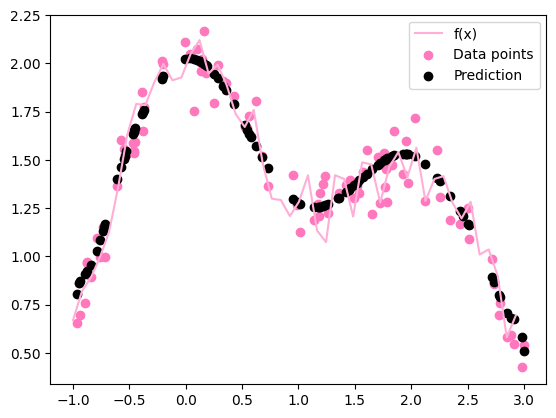

In [7]:
np.random.seed(299)

n = 500
n_boostraps = 100
degree = 18         # A quite high value, just to show.
noise = 0.1

# Make data set.
x = np.linspace(-1, 3, n).reshape(-1, 1)
y = 2 * np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, noise, x.shape)

# Hold out some test data that is never used in training.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

# Combine x transformation and model into one operation
model = make_pipeline(PolynomialFeatures(degree=degree), LinearRegression(fit_intercept=False))

# The following (m x n_bootstraps) matrix holds the column vectors y_pred for each bootstrap iteration.
y_pred = np.empty((y_test.shape[0], n_boostraps))
for i in range(n_boostraps):
    x_, y_ = resample(x_train, y_train)

    # Evaluate the new model on the same test data each time.
    y_pred[:, i] = model.fit(x_, y_).predict(x_test).ravel()

# Note 1: Expectations and variances taken w.r.t. different training data sets, hence the axis=1. 
# Subsequent means are taken across the test data set in order to obtain a total value, but before 
# this we have error/bias/variance calculated per data point in the test set.
# Note 2: The use of keepdims=True is important in the calculation of bias as this maintains the column vector form. 
error = np.mean(np.mean((y_test - y_pred)**2, axis=1, keepdims=True))       # MSE on test set
bias = np.mean((y_test - np.mean(y_pred, axis=1, keepdims=True))**2)        # Model bias
variance = np.mean(np.var(y_pred, axis=1, keepdims=True))                   # Model variance
print('Error:', error)
print('Bias: ', bias)
print('Var:  ', variance)
print('{} >= {} + {} = {}'.format(error, bias, variance, bias+variance))

plt.plot(x[::5, :], y[::5, :], label='f(x)', color = "#ffaed7")                 # The training sets are approximations of f(x), and are represented by y on the RHS of the derived equation
plt.scatter(x_test, y_test, label='Data points', color = "#ff77bc")             # The test set is the data we test our model on. It is represented by y on the LHS of the derived equation
plt.scatter(x_test, np.mean(y_pred, axis=1), label='Prediction', color = "k")   # Taking the mean of the predicted y values (y-tilde) from the bootstrap iterations at each x
plt.legend()
plt.show()

### Plotting $MSE$, bias and variance as functions of polynomial degrees between $[1,30]$ with $500$ data points

In [67]:
np.random.seed(299)

n = 500
n_boostraps = 100
degrees = np.arange(1, 31)        # Testing polynomial degrees between 1 and 30
noise = 0.5

# Make data set.
x = np.linspace(-1, 3, n).reshape(-1, 1)
y = 2 * np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, noise, x.shape)

# Hold out some test data that is never used in training.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

error = np.zeros(len(degrees)); bias = np.zeros(len(degrees)); variance = np.zeros(len(degrees))
for i in range(len(degrees)):
    # Combine x transformation and model into one operation
    model = make_pipeline(PolynomialFeatures(degree=degrees[i]), LinearRegression(fit_intercept=False))

    # The following (m x n_bootstraps) matrix holds the column vectors y_pred for each bootstrap iteration.
    y_pred = np.empty((y_test.shape[0], n_boostraps))
    for j in range(n_boostraps):
        x_, y_ = resample(x_train, y_train)

        # Evaluate the new model on the same test data each time.
        y_pred[:, j] = model.fit(x_, y_).predict(x_test).ravel()

    error[i] = np.mean(np.mean((y_test - y_pred)**2, axis=1, keepdims=True))       # MSE on test set
    bias[i] = np.mean((y_test - np.mean(y_pred, axis=1, keepdims=True))**2)        # Model bias
    variance[i] = np.mean(np.var(y_pred, axis=1, keepdims=True))                   # Model variance

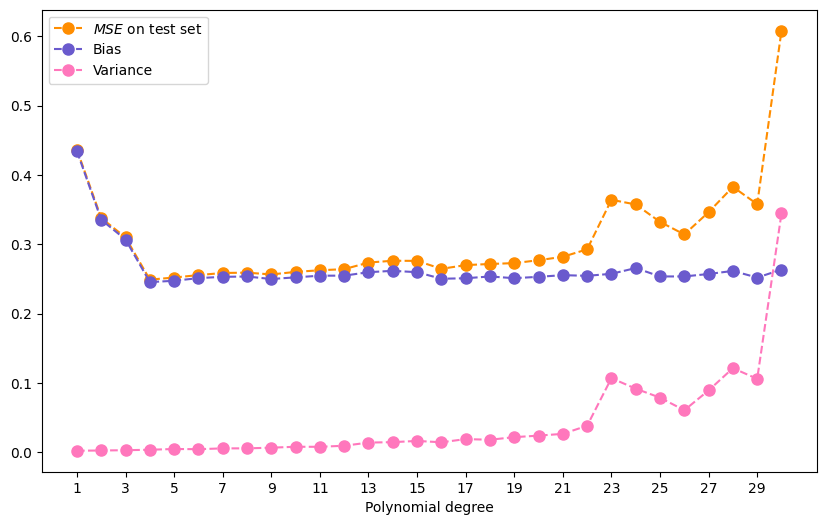

In [69]:
plt.figure(figsize = (10, 6))
plt.plot(degrees, error, label = "MSE on test set", linestyle = "--", marker = "o", markersize = 8, color = "#ff8d00")
plt.plot(degrees, bias, label = "Bias", linestyle = "--", marker = "o", markersize = 8, color = "slateblue")
plt.plot(degrees, variance, label = "Variance", linestyle = "--", marker = "o", markersize = 8, color = "#ff77bc")
plt.legend()
plt.xticks(degrees[::2])
plt.xlabel("Polynomial degree")
plt.show()

### Plotting as functions of number of data points between $[50, 500]$ for polynomial degrees $5$ and $15$

In [97]:
np.random.seed(299)

n = np.arange(50, 501, 10)          # Testing number of data points between 100 and 500
n_boostrap = 100
degrees = [5, 15]        

error = np.zeros((len(degrees), len(n))); bias = np.zeros((len(degrees), len(n))); variance = np.zeros((len(degrees), len(n)))
for i in range(len(n)):
    # Make data set.
    x = np.linspace(-1, 3, n[i]).reshape(-1, 1)
    y = 2 * np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, noise, x.shape)

    # Hold out some test data that is never used in training.
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    for j in range(len(degrees)):
        # Combine x transformation and model into one operation
        model = make_pipeline(PolynomialFeatures(degree=degrees[j]), LinearRegression(fit_intercept=False))

        # The following (m x n_bootstraps) matrix holds the column vectors y_pred for each bootstrap iteration.
        y_pred = np.empty((y_test.shape[0], n_boostraps))
        for k in range(n_boostraps):
            x_, y_ = resample(x_train, y_train)

            # Evaluate the new model on the same test data each time.
            y_pred[:, k] = model.fit(x_, y_).predict(x_test).ravel()

        error[j, i] = np.mean(np.mean((y_test - y_pred)**2, axis=1, keepdims=True))       # MSE on test set
        bias[j, i] = np.mean((y_test - np.mean(y_pred, axis=1, keepdims=True))**2)        # Model bias
        variance[j, i] = np.mean(np.var(y_pred, axis=1, keepdims=True))                   # Model variance

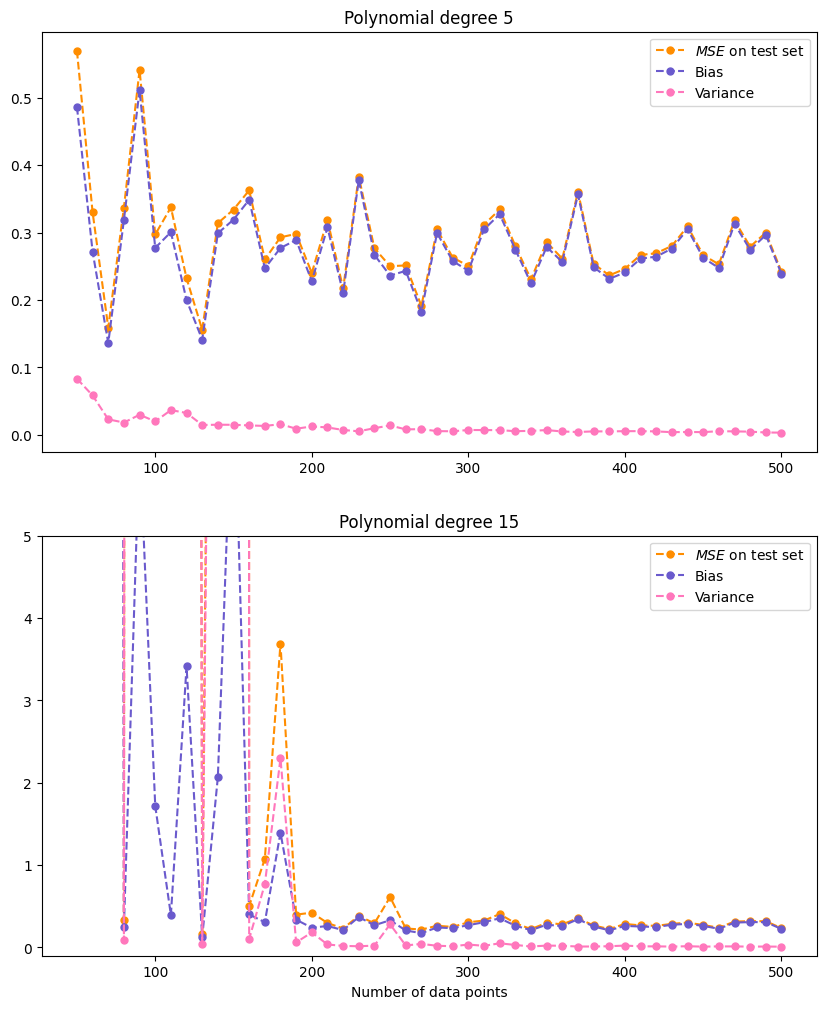

In [98]:
fig, axs = plt.subplots(len(degrees), 1, figsize = (10, 6*len(degrees)))
for i in range(len(degrees)):
    axs[i].plot(n, error[i], label = "MSE on test set", linestyle = "--", marker = "o", markersize = 5, color = "#ff8d00")
    axs[i].plot(n, bias[i], label = "Bias", linestyle = "--", marker = "o", markersize = 5, color = "slateblue")
    axs[i].plot(n, variance[i], label = "Variance", linestyle = "--", marker = "o", markersize = 5, color = "#ff77bc")
    axs[i].legend()
    if degrees[i] > 10: axs[i].set_ylim(-0.1, 5) 
    axs[i].set_title(f"Polynomial degree {degrees[i]}")
plt.xlabel("Number of data points")
plt.show()

#### Note:
For some reason we get very large values for the $MSE$, bias and/or variance at some of the lower numbers of data points $n$ when the polynomial degree is large. I am not sure why this happens, but to see the quantities' evolution at larger $n$ I cropped the $y$-axis at $y=5$ in the lower plot.

### Plotting as functions of noise between $[0.1, 1.5]$ for polynomial degrees $5$ and $15$, and $500$ data points

In [112]:
np.random.seed(299)

n = 500         
n_boostrap = 100
degrees = [5, 15]        
noises = np.arange(0.1, 5, 0.1)  # Testing noise values between 0.1 and 1.5

error = np.zeros((len(degrees), len(noises))); bias = np.zeros((len(degrees), len(noises))); variance = np.zeros((len(degrees), len(noises)))
for i in range(len(noises)):
    # Make data set.
    x = np.linspace(-1, 3, n).reshape(-1, 1)
    y = 2 * np.exp(-x**2) + 1.5 * np.exp(-(x-2)**2) + np.random.normal(0, noises[i], x.shape)

    # Hold out some test data that is never used in training.
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

    for j in range(len(degrees)):
        # Combine x transformation and model into one operation
        model = make_pipeline(PolynomialFeatures(degree=degrees[j]), LinearRegression(fit_intercept=False))

        # The following (m x n_bootstraps) matrix holds the column vectors y_pred for each bootstrap iteration.
        y_pred = np.empty((y_test.shape[0], n_boostraps))
        for k in range(n_boostraps):
            x_, y_ = resample(x_train, y_train)

            # Evaluate the new model on the same test data each time.
            y_pred[:, k] = model.fit(x_, y_).predict(x_test).ravel()

        error[j, i] = np.mean(np.mean((y_test - y_pred)**2, axis=1, keepdims=True))       # MSE on test set
        bias[j, i] = np.mean((y_test - np.mean(y_pred, axis=1, keepdims=True))**2)        # Model bias
        variance[j, i] = np.mean(np.var(y_pred, axis=1, keepdims=True))                   # Model variance

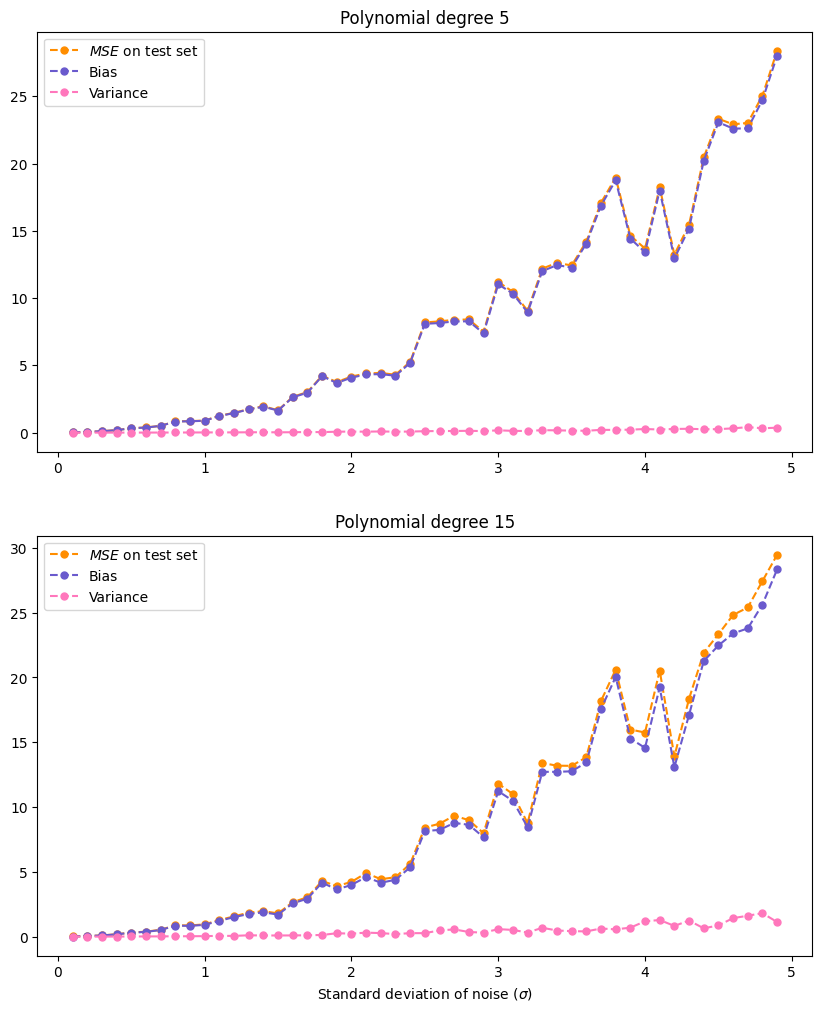

In [120]:
fig, axs = plt.subplots(len(degrees), 1, figsize = (10, 6*len(degrees)))
for i in range(len(degrees)):
    axs[i].plot(noises, error[i], label = "MSE on test set", linestyle = "--", marker = "o", markersize = 5, color = "#ff8d00")
    axs[i].plot(noises, bias[i], label = "Bias", linestyle = "--", marker = "o", markersize = 5, color = "slateblue")
    axs[i].plot(noises, variance[i], label = "Variance", linestyle = "--", marker = "o", markersize = 5, color = "#ff77bc")
    axs[i].legend()
    axs[i].set_title(f"Polynomial degree {degrees[i]}")
plt.xlabel(r"Standard deviation of noise ($\sigma$)")
plt.show()

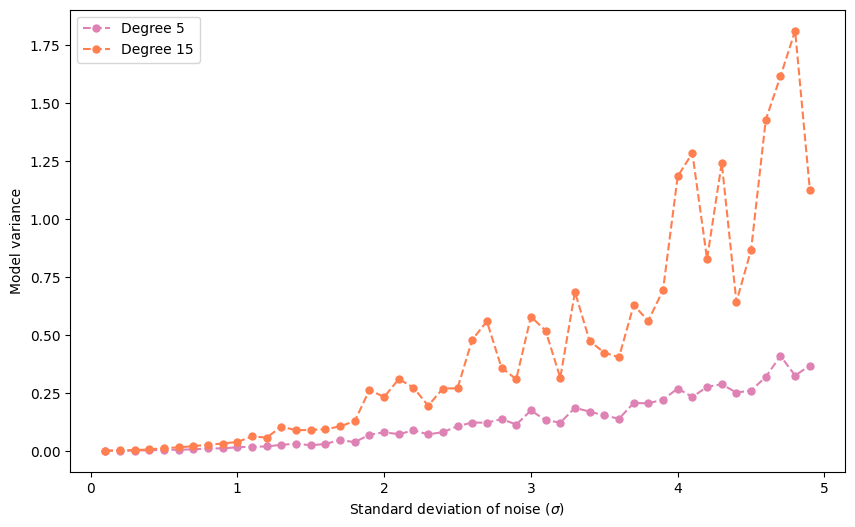

In [126]:
plt.figure(figsize = (10, 6))
plt.plot(noises, variance[0], label = f"Degree 5", linestyle = "--", marker = "o", markersize = 5, color = "#de82b4")
plt.plot(noises, variance[1], label = f"Degree 15", linestyle = "--", marker = "o", markersize = 5, color = "coral")
plt.legend()
plt.xlabel(r"Standard deviation of noise ($\sigma$)")
plt.ylabel(r"Model variance")
plt.show()

## Discussion:

We see from the plot of $MSE$, bias and variance as functions of polynomial degree that the latter indeed increases significantly as we reach a certain complexity. Beyond this point the model fits to the fluctuations in the training set, which are random and stem from a normal distribution, and as a consequence it cannot accurately represent the test set. On the other hand, the bias remains more or less constant after this point. This is because the model has learnt the noise of the training set, and as a result the mean value of the its prediction based on the test set converges to the mean value of the underlying noise in the data, which is zero. Hence the bias term goes to the mean value of the test set, which is the same for all polynomial degrees. At the lower complexities we instead see that we have larger bias since the model's prediction based on the test set cannot properly capture its pattern, thus increasing the deviation from its expectation value and the test set itself. Nevertheless, we see that both ends of the complexity spectrum lead to a larger error, and the bias-variance tradeoff is clearly showcased in the figure.

It is not surprising that the error generally increases as we decrease the number of data points, because then the model has less points to fit to, hence less chance of distinguishing the pattern of $f(\mathbf{x})$ from the random fluctuations caused by the added noise. This especially affects the bias, since the test data and the training data will have fewer visible similarities. From this analysis we can easily understand why the bias and $MSE$ increase drastically with the noise level as well. The increased fluctuations in the data leads to a larger deviation between the training set and the test data, and thus the model based on the training set will fit worse to the test set. However, from the third term in the expression for the $MSE$ derived at the top of this notebook I would expect it to be larger than the bias by approximately $\sigma^2$ (since the variance is so low), which is clearly not the case. In fact, even at $\sigma^2=5^2=25$ we see that the difference between $MSE$ and bias is of order unity, which indicates that some miscalculations (or misinterpretations) have been made along the way. Moreover, although it is not very visible in the figures containing $MSE$, bias and variance as functions of $\sigma$, the last figure showing the model variances for polynomial degrees $5$ and $15$ clearly showcases that the model with higher complexity is affected to a larger degree by higher noise levels than the model with lower complexity. This is obviously the consequence of overfitting: The model "learns" the noise in the training set, fits to it and thus deviates more from the test data.